1、导入必要的包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2、读取训练数据集

In [3]:
train_data_path = r"./data/train.csv"
df = pd.read_csv(train_data_path,nrows=1e6)

## 1、 单个特征分布、特征对结果的影响

3、查看数据集top 5，包括数据集的特征种类和数量

In [4]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [22]:
_P_A=df['click'].value_counts()[1]/df['click'].value_counts().sum()
print('点击概念:{}'.format(_P_A))

def get_probability(v='id', _df=df, nrows=-1):
    print('\n-------%s属性的取值和次数-------'%v)
    _P=pd.concat([_df[v].value_counts(),_df[v].value_counts(normalize=True),\
                   _df[_df['click']==1][v].value_counts(normalize=True)],\
                   axis=1,join_axes=[_df[v].value_counts().index],keys=['特征分布','P_C','P_C|A']).fillna(0)
    #P(A│ci)=(P(ci│A)P(A))/(P(ci))
    _P['P_A|C']=(_P['P_C|A']*_P_A)/_P['P_C']
    _P['概率提升比%']=(_P['P_A|C']-_P_A)*100/_P_A
    _P = _P.sort_values(by=['特征分布','概率提升比%'],ascending=[0,0])
    print(_P[:nrows])

点击概念:0.160219


In [5]:
# redhead黄红发
# Kaggle 竞赛网页为:https://www.kaggle.com/c/avazu-ctr-prediction
# total 24 columns
site_cols = ['site_id', 'site_domain','site_category']
app_cols = ['app_id', 'app_domain', 'app_category']
device_cols = ['device_id','device_ip', 'device_model', 'device_type', 'device_conn_type']
anonymized_cols = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
other_cols = ['id', 'hour', 'click',]

In [46]:
site_1 = df[site_cols + app_cols + device_cols][df.site_id == '85f751fd' ]
site_2 = df[site_cols + app_cols + device_cols][df.site_id == '1fbe01fe' ]
print(site_1.shape[0])
print(site_2.shape[0])

332893
232096


In [47]:
print(site_1['site_domain'].value_counts())
print(site_2['site_domain'].value_counts())

c4e18dd6    332893
Name: site_domain, dtype: int64
f3845767    232096
Name: site_domain, dtype: int64


In [7]:
df[other_cols + anonymized_cols].head()

,id,hour,click,C1,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,14102100,0,1005,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,14102100,0,1005,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,14102100,0,1005,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,14102100,0,1005,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,14102100,0,1005,18993,320,50,2161,0,35,-1,157


In [8]:
# 特征值数量
for col in other_cols + site_cols + app_cols + device_cols + anonymized_cols:
    print(col, len(df[col].value_counts()))

id 1000000
hour 6
click 2
site_id 2075
site_domain 2030
site_category 21
app_id 2309
app_domain 156
app_category 23
device_id 83431
device_ip 313002
device_model 4581
device_type 4
device_conn_type 4
C1 7
C14 606
C15 8
C16 9
C17 162
C18 4
C19 41
C20 161
C21 35


In [9]:
print(df['device_ip'].head())
print(len(df['device_ip'].value_counts()))

0    ddd2926e
1    96809ac8
2    b3cf8def
3    e8275b8f
4    9644d0bf
Name: device_ip, dtype: object
313002


In [18]:
device_ip_2 = df['device_ip'].apply(lambda x: x[:4])
print(len(device_ip_2.value_counts()))
device_ip_2.head()

64981


0    ddd2
1    9680
2    b3cf
3    e827
4    9644
Name: device_ip, dtype: object

In [19]:
new_df = df.copy()
new_df['device_ip'] = device_ip_2

In [30]:
get_probability('site_id', df, 20)


-------site_id属性的取值和次数-------
            特征分布       P_C     P_C|A     P_A|C      概率提升比%
85f751fd  332893  0.332893  0.200669  0.096581  -39.719644
1fbe01fe  232096  0.232096  0.313109  0.216143   34.904924
d9750ee7   38603  0.038603  0.104644  0.434319  171.078072
e151e245   32359  0.032359  0.055512  0.274854   71.548931
5b08c53b   16455  0.016455  0.050281  0.489578  205.567777
543a539e   16355  0.016355  0.005193  0.050871  -68.248901
5b4d2eda   16064  0.016064  0.010461  0.104333  -34.881213
856e6d3f   13231  0.013231  0.004993  0.060464  -62.261616
43d6df75    9924  0.009924  0.004631  0.074768  -53.333725
5ee41ff2    9011  0.009011  0.017195  0.305737   90.824704
f282ab5a    7526  0.007526  0.001017  0.021658  -86.482096
6399eda6    7437  0.007437  0.004406  0.094931  -40.749380
17caea14    6249  0.006249  0.009106  0.233477   45.723888
6256f5b4    6109  0.006109  0.006110  0.160255    0.022695
0a742914    5894  0.005894  0.009737  0.264676   65.196351
030440fe    5682  0.00568

In [29]:
get_probability('app_id', df, 20)


-------app_id属性的取值和次数-------
            特征分布       P_C     P_C|A     P_A|C     概率提升比%
ecad2386  667107  0.667107  0.799331  0.191975  19.820496
e2fcccd2   32263  0.032263  0.027207  0.135108 -15.672718
febd1138   24725  0.024725  0.006941  0.044975 -71.929221
54c5d545   12027  0.012027  0.004943  0.065852 -58.898861
9c13b419   11481  0.011481  0.016627  0.232036  44.823983
39947756    8542  0.008542  0.002153  0.040389 -74.791587
2d869bee    7860  0.007860  0.011672  0.237913  48.492679
03528b27    7037  0.007037  0.004144  0.094358 -41.106616
5e3f096f    6991  0.006991  0.000618  0.014161 -91.161433
66f5e02e    6740  0.006740  0.010454  0.248516  55.110393
3692fd30    6157  0.006157  0.001167  0.030372 -81.043488
51cedd4e    5623  0.005623  0.002759  0.078606 -50.938574
f0d41ff1    5468  0.005468  0.003008  0.088149 -44.982036
e2a1ca37    5226  0.005226  0.003614  0.110792 -30.849529
3c4b944d    5201  0.005201  0.004488  0.138243 -13.716447
0acbeaa3    5164  0.005164  0.004088  0.12

In [28]:
get_probability('device_id', df, 20)


-------device_id属性的取值和次数-------
            特征分布       P_C     P_C|A     P_A|C      概率提升比%
a99f214a  840265  0.840265  0.888459  0.169408    5.735562
c357dbff    1310  0.001310  0.003614  0.441985  175.862871
936e92fb     482  0.000482  0.000144  0.047718  -70.217114
31da1bd0     292  0.000292  0.000000  0.000000 -100.000000
787d2bb0     274  0.000274  0.000000  0.000000 -100.000000
b09da1c4     267  0.000267  0.000331  0.198502   23.894090
e8440dbf     246  0.000246  0.000000  0.000000 -100.000000
d857ffbb     214  0.000214  0.000262  0.196262   22.495885
f0b5276b     195  0.000195  0.000000  0.000000 -100.000000
dcefb131     155  0.000155  0.000000  0.000000 -100.000000
f765372d     135  0.000135  0.000000  0.000000 -100.000000
7166f9fd     133  0.000133  0.000000  0.000000 -100.000000
79b5916c     130  0.000130  0.000012  0.015385  -90.397758
045d057f     121  0.000121  0.000000  0.000000 -100.000000
afeffc18     119  0.000119  0.000175  0.235294   46.857812
c810e66f     118  0.000

In [33]:
get_probability('site_domain', df, 20)


-------site_domain属性的取值和次数-------
            特征分布       P_C     P_C|A     P_A|C      概率提升比%
c4e18dd6  348412  0.348412  0.217920  0.100212  -37.453225
f3845767  232096  0.232096  0.313109  0.216143   34.904924
98572c79   41031  0.041031  0.107578  0.420073  162.186525
7e091613   33718  0.033718  0.056304  0.267543   66.985538
7687a86e   23775  0.023775  0.072083  0.485762  203.186486
16a36ef3   17007  0.017007  0.012233  0.115247  -28.069291
c7ca3108   16355  0.016355  0.005193  0.050871  -68.248901
27e3c518   13991  0.013991  0.006098  0.069831  -56.415528
58a89a43   13231  0.013231  0.004993  0.060464  -62.261616
17d996e6    9083  0.009083  0.017245  0.304195   89.861783
61eb5bc4    7540  0.007540  0.001017  0.021618  -86.507195
968765cd    7437  0.007437  0.004406  0.094931  -40.749380
0dde25ec    6249  0.006249  0.009106  0.233477   45.723888
28f93029    6109  0.006109  0.006110  0.160255    0.022695
510bd839    5894  0.005894  0.009737  0.264676   65.196351
08ba7db9    5682  0.0

In [36]:
get_probability('app_domain', df, 20)


-------app_domain属性的取值和次数-------
            特征分布       P_C     P_C|A     P_A|C     概率提升比%
7801e8d9  707429  0.707429  0.819360  0.185569  15.822189
2347f47a  140069  0.140069  0.080789  0.092412 -42.321699
d9b5648e   40779  0.040779  0.030539  0.119988 -25.109863
5c5a694b   32263  0.032263  0.027207  0.135108 -15.672718
82e27996   24726  0.024726  0.006941  0.044973 -71.930356
aefc06bd    7002  0.007002  0.004013  0.091831 -42.684135
6f7ca2ba    6740  0.006740  0.010454  0.248516  55.110393
ae637522    5700  0.005700  0.001311  0.036842 -77.005158
45a51db4    5164  0.005164  0.004088  0.126840 -20.833572
33da2e74    4574  0.004574  0.003202  0.112156 -29.998525
5c620f04    3768  0.003768  0.000712  0.030255 -81.116611
b5f3b24a    3261  0.003261  0.000699  0.034345 -78.563533
5b9c592b    3260  0.003260  0.000855  0.042025 -73.770564
b8d325c3    2013  0.002013  0.003370  0.268256  67.431037
df32afa9    1974  0.001974  0.000493  0.040020 -75.021525
885c7f3f    1742  0.001742  0.001698  

###### 重点观察属性值多的特征: id, site_id, site_domain, app_id,app_domain, device_id, device_ip ,device_model,C14, C17, C20
- 广告id没有重复,有多少条记录就多少id, id属于类别型, 所以没办法从这个特征上学到有用的东西
- site, app, device 3类特征明显有关联性, 重点关注
- device_ip 假设其值是16位的ip地址,前4位可以表示地理区域,相邻值的话,在地理上基本上也是相邻, 若假设不成立则这个特征没什么卵用. ip段出现少于10的归为一类
- site_domain 网站域名, 通过移动设备mobile浏览器浏览名气大的网站,流量大, 点击的可能行就更大, 也有可能是通过APP内嵌的浏览器访问
- site_id 一个site_id只对应一个site_domain, 存在一个site_domain多个site_id, 两者是强关联性




### 特征描述
- id                  float64 广告id
- click               int64   点击事件
- hour                int64   日期时间 
- banner_pos          int64   广告位置
- site_id             object  网站id
- site_domain         object  网站域名
- site_category       object  网站分类
- app_id              object  app id
- app_domain          object  app域名
- app_category        object  app分类
- device_id           object  设备id
- device_ip           object  设备ip
- device_model        object  设备模式
- device_type         int64   设备类型
- device_conn_type    int64   设备连接类型
- C1                  int64
- C14                 int64
- C15                 int64
- C16                 int64
- C17                 int64
- C18                 int64
- C19                 int64
- C20                 int64
- C21                 int64

4、查看特征的类型

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 24 columns):
id                  float64
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: float64(1), int64(14), object(9)
memory usage: 1.8+ GB


5、查看匿名特征的分布

In [5]:
df[['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']].describe()

,C1,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.004979e+03,1.848285e+04,3.179269e+02,5.912548e+01,2.082423e+03,1.316058e+00,1.772594e+02,4.927169e+04,9.371292e+01
std,9.959851e-01,4.869140e+03,2.520062e+01,4.641713e+01,5.935536e+02,1.379968e+00,3.237208e+02,5.004919e+04,6.752872e+01
min,1.001000e+03,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.300000e+01
25%,1.005000e+03,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,3.300000e+01
50%,1.005000e+03,2.035200e+04,3.200000e+02,5.000000e+01,2.333000e+03,0.000000e+00,3.900000e+01,-1.000000e+00,7.900000e+01
75%,1.005000e+03,2.175900e+04,3.200000e+02,5.000000e+01,2.502000e+03,3.000000e+00,1.670000e+02,1.000840e+05,1.570000e+02
max,1.012000e+03,2.211800e+04,1.024000e+03,1.024000e+03,2.547000e+03,3.000000e+00,1.835000e+03,1.002480e+05,2.210000e+02


In [6]:
#点击率统计
P_A=df['click'].value_counts()[1]/df['click'].value_counts().sum()
print(df['click'].value_counts())
print('点击概率为',P_A)

0    8338643
1    1661357
Name: click, dtype: int64
点击概率为 0.1661357


In [8]:
var=[ 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
#筛选出点击率为1的事件
train_df_click=df[df['click']==1]
for v in var:
    print('\n%s属性的取值和次数'%v)
    P=pd.concat([df[v].value_counts(),df[v].value_counts(normalize=True),\
                   train_df_click[v].value_counts(normalize=True)],\
                   axis=1,join_axes=[df[v].value_counts().index],keys=['特征分布','P_C','P_C|A']).fillna(0)
    #P(A│ci)=(P(ci│A)P(A))/(P(ci))
    P['P_A|C']=(P['P_C|A']*P_A)/P['P_C']
    P['概率提升比%']=(P['P_A|C']-P_A)*100/P_A
    print(P)


hour属性的取值和次数
            特征分布       P_C     P_C|A     P_A|C    概率提升比%
14102104  264711  0.264711  0.249821  0.151206 -5.625169
14102102  207471  0.207471  0.195139  0.150696 -5.943889
14102103  193355  0.193355  0.204907  0.169791  5.974520
14102101  137442  0.137442  0.149002  0.173695  8.411041
14102100  119006  0.119006  0.129772  0.174714  9.046917
14102105   78015  0.078015  0.071359  0.146549 -8.532234

C1属性的取值和次数
        特征分布       P_C     P_C|A     P_A|C     概率提升比%
1005  935852  0.935852  0.943328  0.161499   0.798798
1002   31219  0.031219  0.044464  0.228194  42.426534
1010   18488  0.018488  0.008663  0.075076 -53.141809
1012   11916  0.011916  0.002409  0.032393 -79.781786
1008    1563  0.001563  0.000855  0.087652 -45.292411
1007     855  0.000855  0.000231  0.043275 -72.990186
1001     107  0.000107  0.000050  0.074766 -53.334901

banner_pos属性的取值和次数
     特征分布       P_C     P_C|A     P_A|C      概率提升比%
0  777714  0.777714  0.735556  0.151534   -5.420796
1  220187  0.220187

            特征分布       P_C     P_C|A     P_A|C      概率提升比%
50e219e0  360056  0.360056  0.239073  0.106383  -33.601226
28905ebd  262519  0.262519  0.338106  0.206351   28.792951
f028772b  260471  0.260471  0.298629  0.183690   14.649520
3e814130   75062  0.075062  0.104538  0.223136   39.269089
f66779e6    8842  0.008842  0.001323  0.023976  -85.035186
76b2941d    7880  0.007880  0.001897  0.038579  -75.921283
335d28a8    7251  0.007251  0.004825  0.106606  -33.462333
70fb0e29    4961  0.004961  0.003970  0.128200  -19.984546
0569f928    4505  0.004505  0.000824  0.029301  -81.712046
75fa27f6    3958  0.003958  0.003901  0.157908   -1.442379
72722551    2705  0.002705  0.001922  0.113863  -28.932763
c0dd3be3     552  0.000552  0.000543  0.157609   -1.629210
dedf689d     508  0.000508  0.000181  0.057087  -64.369635
a818d37a     374  0.000374  0.000000  0.000000 -100.000000
e787de0e     281  0.000281  0.000206  0.117438  -26.701750
bcf865d9      25  0.000025  0.000019  0.120000  -25.1025

            特征分布       P_C     P_C|A     P_A|C      概率提升比%
07d7df22  679869  0.679869  0.807719  0.190348   18.805157
0f2161f8  225789  0.225789  0.144596  0.102605  -35.959752
8ded1f7a   29806  0.029806  0.011104  0.059686  -62.747259
f95efa07   28765  0.028765  0.025609  0.142639  -10.972717
cef3e649   25260  0.025260  0.007078  0.044893  -71.980157
d1327cf5    4302  0.004302  0.001348  0.050209  -68.662141
fc6fa53d    1436  0.001436  0.000094  0.010446  -93.480372
75d80bbe    1410  0.001410  0.000687  0.078014  -51.307782
09481d60    1108  0.001108  0.000474  0.068592  -57.188562
4ce2e9fc     943  0.000943  0.000337  0.057264  -64.258889
879c24eb     373  0.000373  0.000193  0.083110  -48.127301
dc97ec06     367  0.000367  0.000468  0.204360   27.550211
a3c42688     214  0.000214  0.000062  0.046729  -70.834313
0f9a328c     147  0.000147  0.000062  0.068027  -57.541109
a86a3e89      57  0.000057  0.000050  0.140351  -12.400603
4681bb9d      54  0.000054  0.000056  0.166667    4.0242

           特征分布       P_C     P_C|A     P_A|C      概率提升比%
8a4875bd  59771  0.059771  0.049595  0.132941  -17.025619
d787e91b  42206  0.042206  0.047884  0.181775   13.454149
1f0bc64f  37525  0.037525  0.046056  0.196642   22.733408
4ea23a13  19853  0.019853  0.024897  0.200927   25.407606
a0f5f879  17158  0.017158  0.019180  0.179100   11.784575
76dc4769  16538  0.016538  0.019711  0.190954   19.183222
711ee120  15399  0.015399  0.022994  0.239236   49.318317
7abbbd5c  15144  0.015144  0.011796  0.124802  -22.105430
ecb851b2  14844  0.014844  0.016509  0.178186   11.214321
c6263d8a  14186  0.014186  0.022064  0.249189   55.530456
5096d134  13774  0.013774  0.012945  0.150574   -6.020170
aad45b01  13586  0.013586  0.009705  0.114456  -28.562744
99e427c9  12359  0.012359  0.006479  0.083987  -47.579639
3bd9e8e7  12178  0.012178  0.017719  0.233125   45.504159
84ebbcd4  11707  0.011707  0.024348  0.333219  107.977482
be6db1d7  11390  0.011390  0.010754  0.151273   -5.583578
779d90c2  1109

        特征分布       P_C     P_C|A     P_A|C      概率提升比%
35    487516  0.487516  0.468796  0.154067   -3.839908
39    138492  0.138492  0.209538  0.242411   51.299855
547    75777  0.075777  0.029241  0.061826  -61.411476
299    47451  0.047451  0.027494  0.092833  -42.058928
297    46182  0.046182  0.016790  0.058248  -63.644885
167    45689  0.045689  0.038959  0.136619  -14.729640
687    39021  0.039021  0.033411  0.137183  -14.378106
1063   23237  0.023237  0.076333  0.526316  228.497737
431    13884  0.013884  0.020984  0.242149   51.136405
175    12483  0.012483  0.009718  0.124730  -22.150536
163    12457  0.012457  0.005349  0.068797  -57.060860
303    10818  0.010818  0.022713  0.336384  109.952505
47      8215  0.008215  0.009843  0.191966   19.814701
171     7399  0.007399  0.008888  0.192458   20.122108
427     6597  0.006597  0.002721  0.066091  -58.749807
1711    2980  0.002980  0.004444  0.238926   49.124745
813     2883  0.002883  0.001816  0.100937  -37.000902
551     20

6、观察每类特征的CTR的平均值，并显示top 10

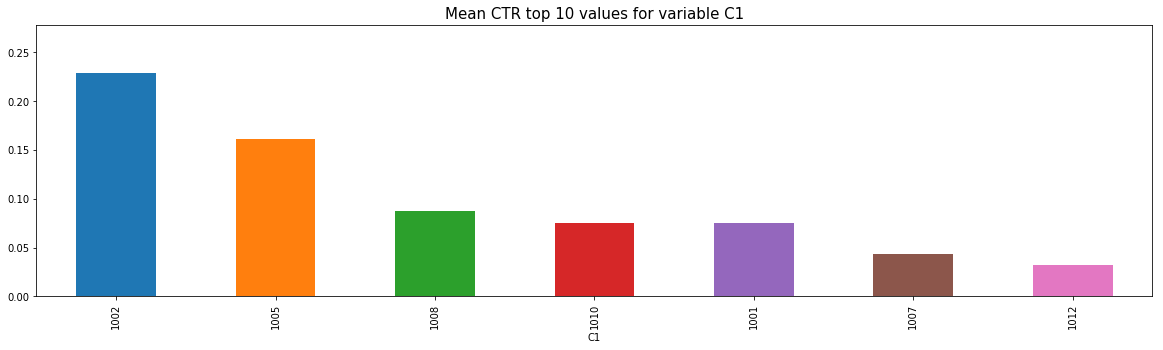

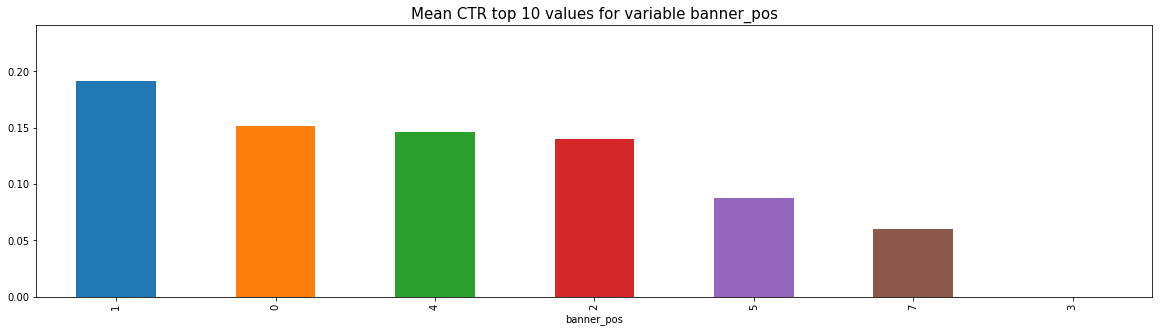

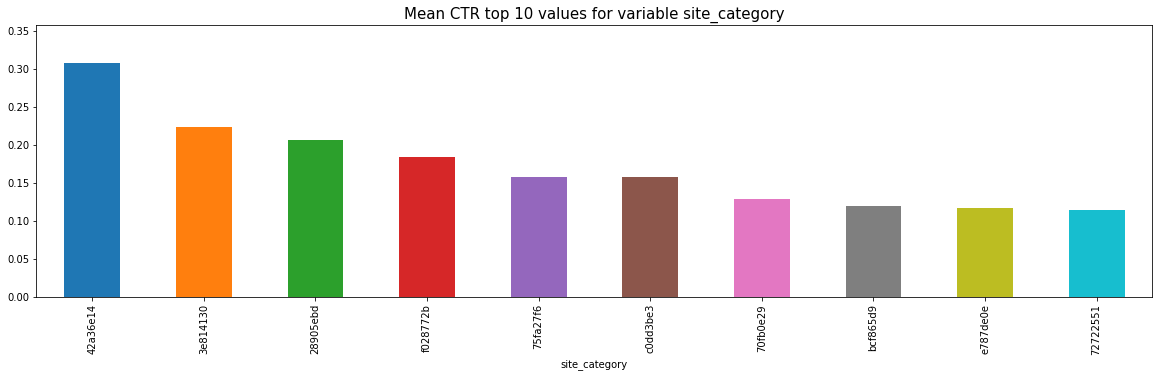

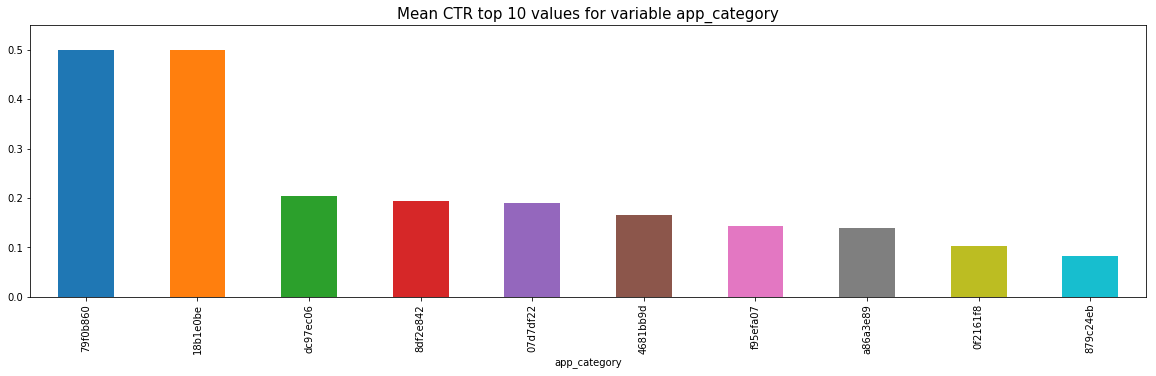

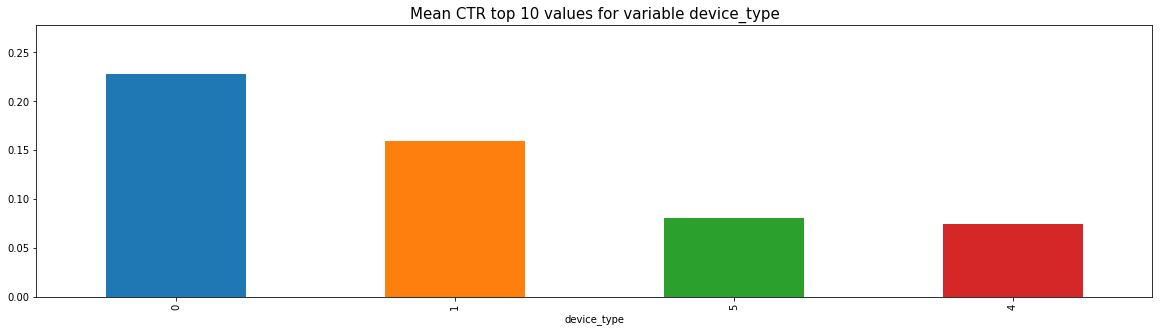

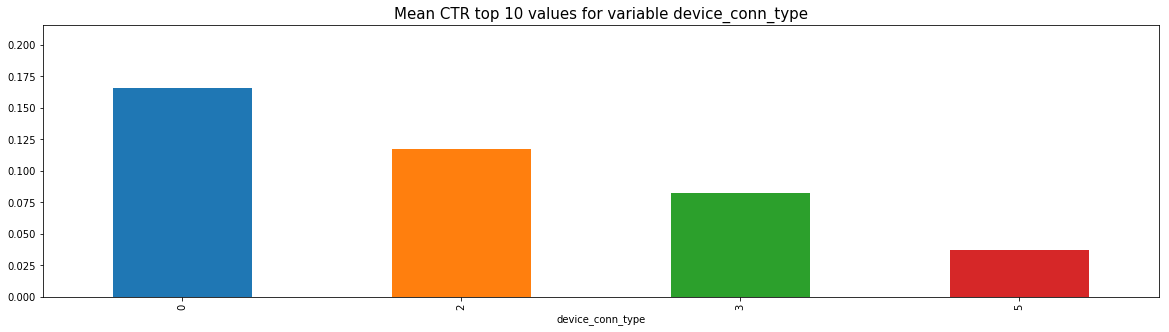

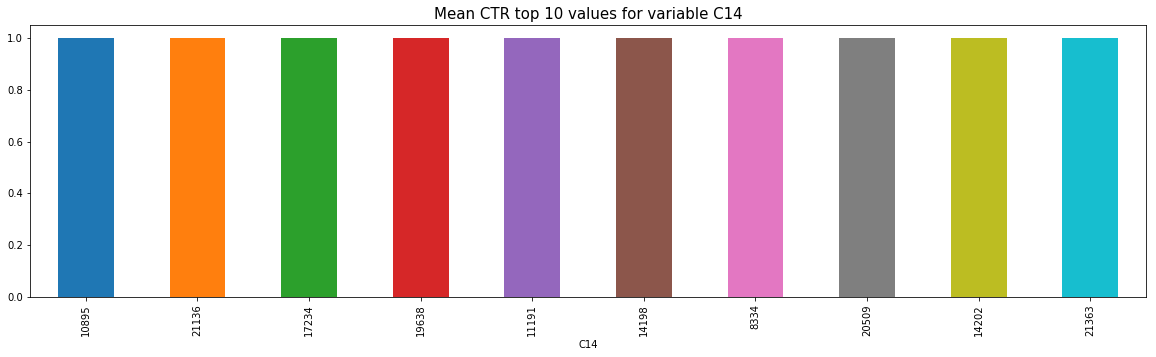

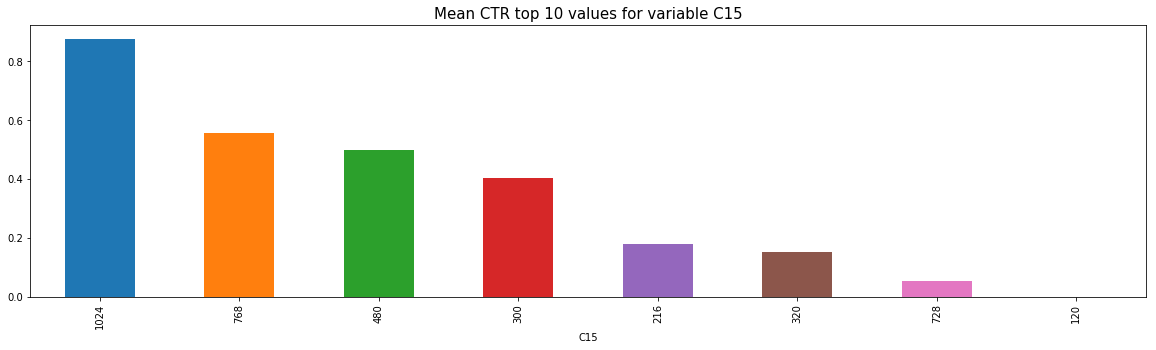

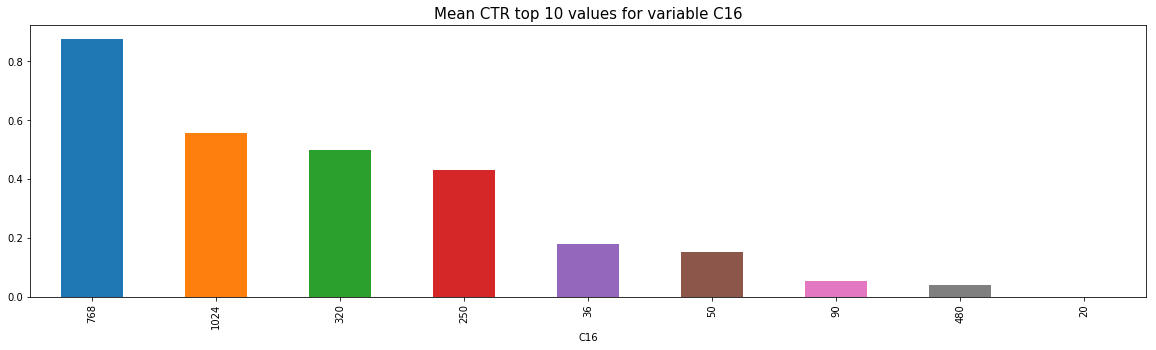

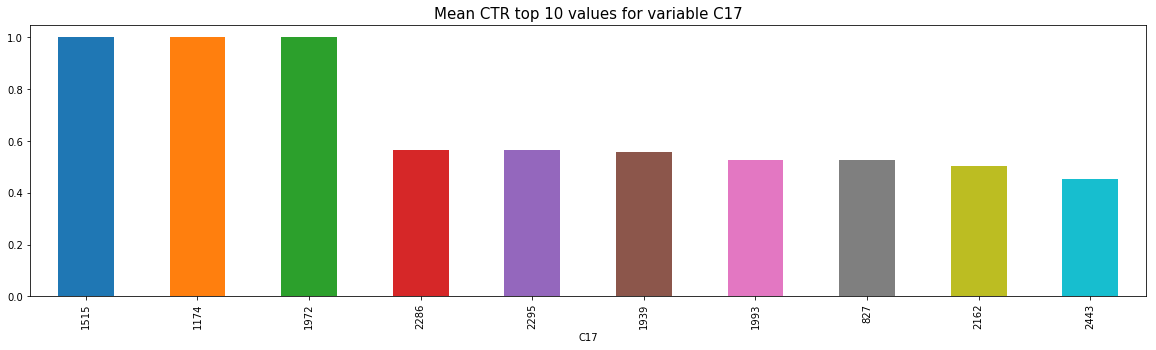

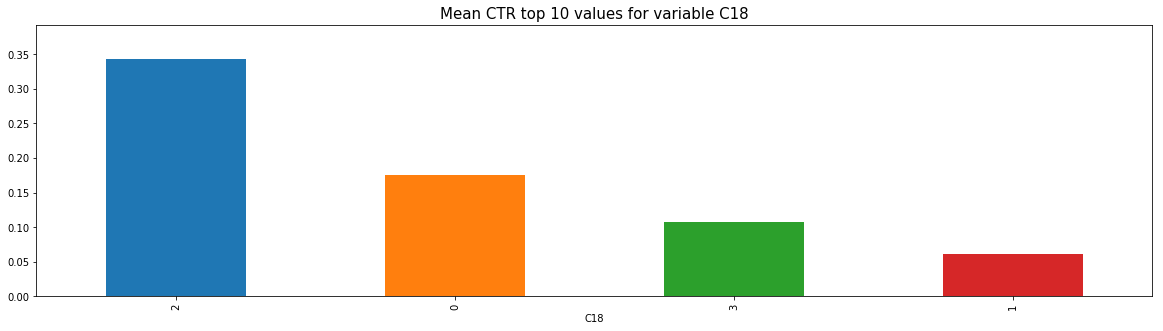

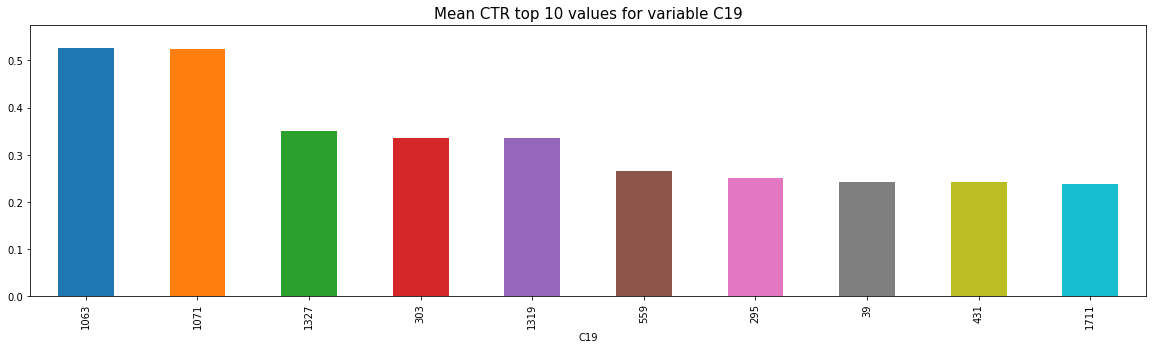

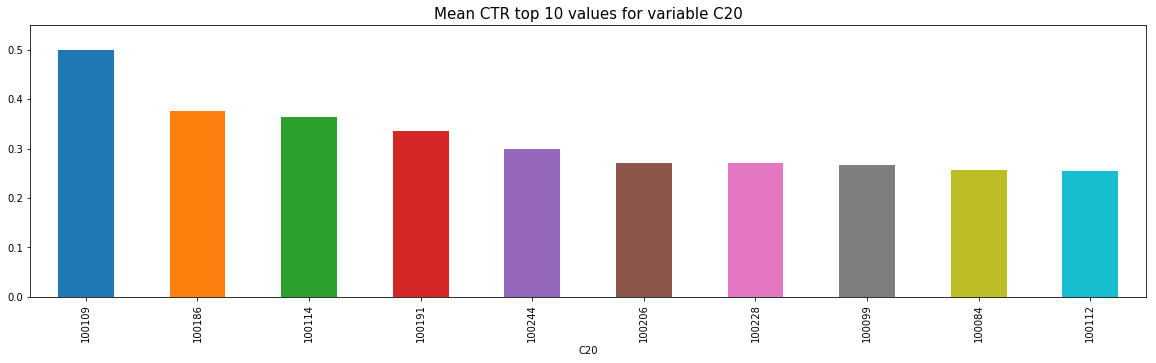

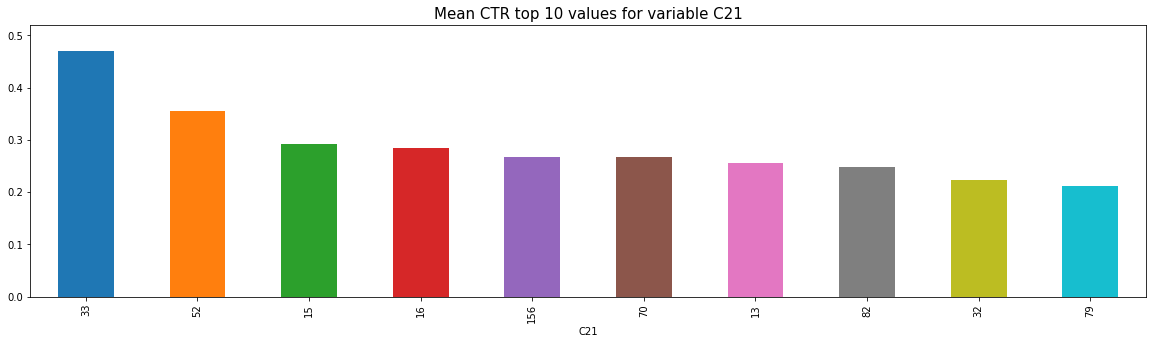

In [9]:
for cat in df.columns:
    if cat not in ['id', 'click', 'hour', 'device_id', 'device_ip',
                   'device_model'] and 'id' not in cat and 'domain' not in cat and 'ip' not in cat:
        gb = df.groupby(cat)['click'].mean().sort_values(ascending=False).head(10)
        plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
        plot.set_ylim(0, np.max(gb.values) + 0.05)
        plt.title('Mean CTR top 10 values for variable %s' % cat, fontsize=15)
        plt.show()

7、将"hour"字段分为"小时"、"天"、"周"

In [10]:
def get_date(x_):
    return int(str(x_)[:6])


def get_day(x_):
    return dict_day[str(x_)[4:6]]


def get_hour(x_):
    return int(str(x_)[6:])


dict_day = {'21': 2, '22': 3, '23': 4, '24': 5, '25': 6, '26': 0, '27': 1, '28': 2, '29': 3, '30': 4, '31': 5}

8、每天的CTR平均值

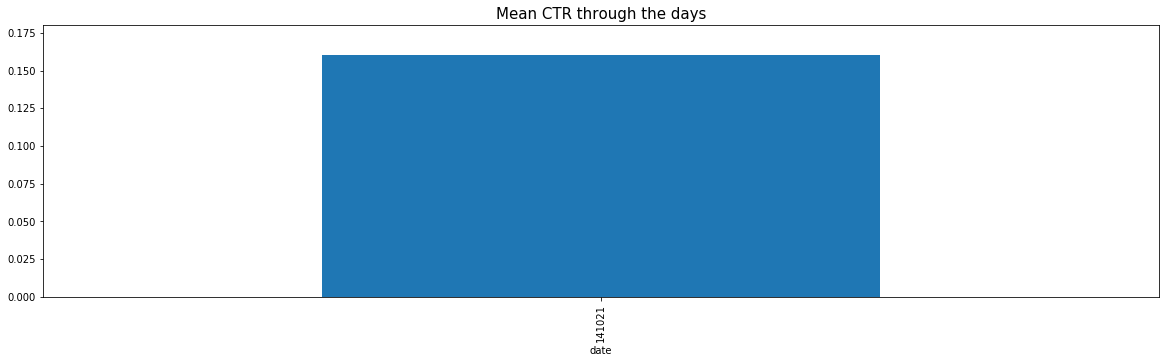

In [11]:
df['date'] = df['hour'].map(get_date)
gb = df.groupby('date')['click'].mean()
plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
plot.set_ylim(0, np.max(gb.values) + 0.02)
plt.title('Mean CTR through the days', fontsize=15)
plt.show()

9、一个星期中每天的CTR平均值

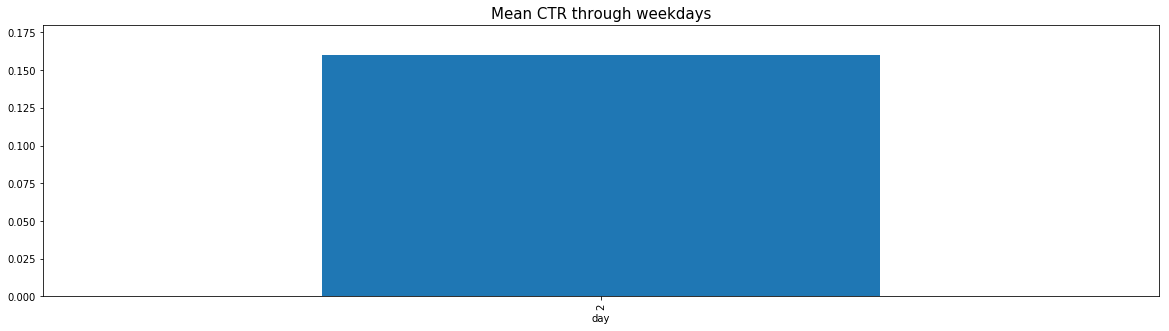

In [12]:
df['day'] = df['hour'].map(get_day)
gb = df.groupby('day')['click'].mean()
plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
plot.set_ylim(0, np.max(gb.values) + 0.02)
plt.title('Mean CTR through weekdays', fontsize=15)
plt.show()

10、一天中每小时的CTR平均值

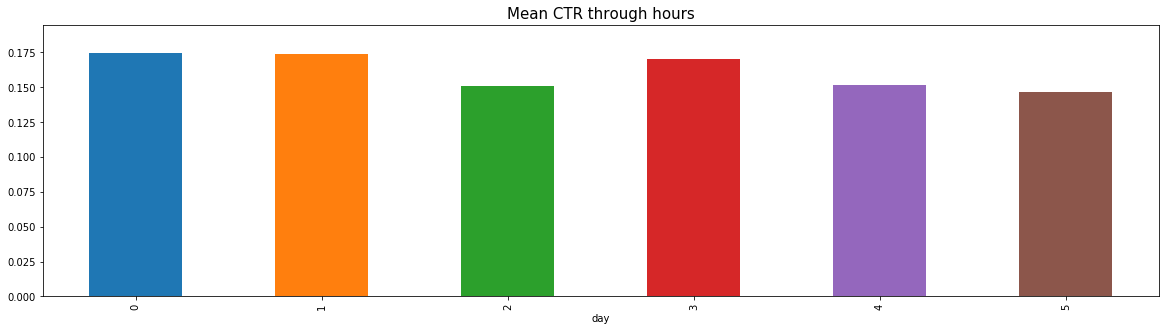

In [13]:
df['day'] = df['hour'].map(get_hour)
gb = df.groupby('day')['click'].mean()
plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
plot.set_ylim(0, np.max(gb.values) + 0.02)
plt.title('Mean CTR through hours', fontsize=15)
plt.show()

# 中间结论：

1）类别特征以及其组合包含有CTR信息 
2）'hour'字段应该以星期和小时的方式进行处理

12、分析"site_id"和"app_id"两者对用户行为的影响

（1）按照"site_id"字段中的不同类别进行分组并计数，并显示top 10

In [14]:
df.groupby('site_id')['click'].count().sort_values(ascending=False).head(10)

site_id
85f751fd    332893
1fbe01fe    232096
d9750ee7     38603
e151e245     32359
5b08c53b     16455
543a539e     16355
5b4d2eda     16064
856e6d3f     13231
43d6df75      9924
5ee41ff2      9011
Name: click, dtype: int64

（2）按照"app_id"字段中的不同类别进行分组并计数，并显示top 10

In [12]:
df.groupby('app_id')['click'].count().sort_values(ascending=False).head(10)

app_id
ecad2386    25832830
92f5800b     1555283
e2fcccd2     1129016
febd1138      759098
9c13b419      757812
7358e05e      615635
a5184c22      491457
d36838b1      457572
685d1c4c      408515
54c5d545      397693
Name: click, dtype: int64

（3）计算site_id为85f751fd占总数据的比例

In [15]:
var1 = df[df['site_id'] == '85f751fd'].shape[0] / df.shape[0]
print(var1)

0.332893


（4）计算app_id为ecad2386占总数据的比例

In [16]:
var2 = df[df['app_id'] == 'ecad2386'].shape[0] / df.shape[0]
print(var2)

0.667107


（5）3）和4）的比例之和

In [17]:
var3 = df[df['site_id'] == '85f751fd'].shape[0] / df.shape[0] + df[df['app_id'] == 'ecad2386'].shape[0] / df.shape[0]
print(var3)

1.0


# 中间结论
'site_id'为85f751fd)占总数据量的33%,'app_id为ecad2386占总数据量的67%。因此,可以得到以下结论,即'site_id'为85f751fd代表mobile
用户, 'app_id'为ecad2386代表app用户，同时就意味着两者不回同时出现，也就意味着“app_id”和“si te_id”两个特征需要给予重点关注。

13、mobile用户的平均CTR

In [18]:
df[df['site_id'] == '85f751fd']['click'].mean()

0.09658058295007706

14、app用户的平均CTR

In [19]:
df[df['site_id'] != '85f751fd']['click'].mean()

0.19197520038014892

15、app用户和mobile用户的平均ctr比较

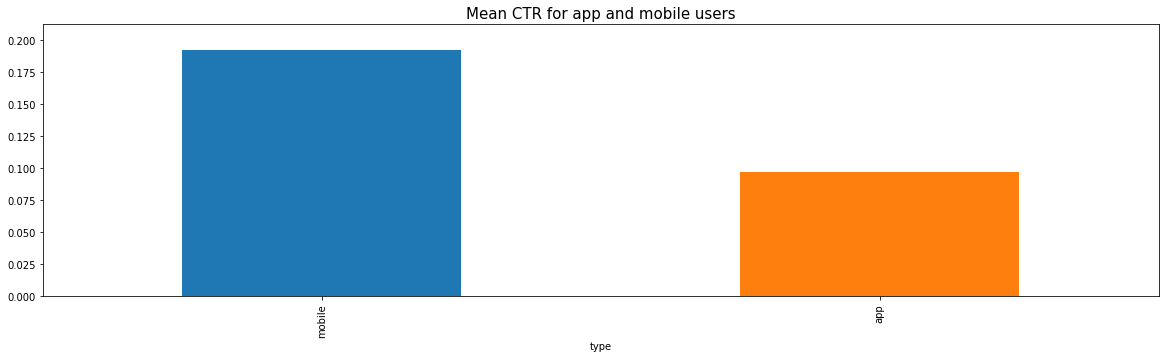

In [20]:
df['type'] = df['site_id'].map(lambda x_: 'mobile' if x_ != '85f751fd' else 'app')
gb = df.groupby('type')['click'].mean().sort_values(ascending=False)
plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
plot.set_ylim(0, np.max(gb.values) + 0.02)
plt.title('Mean CTR for app and mobile users', fontsize=15)
plt.show()

# 中间结论
app用户和mobile用户的平均CTR几乎相差2倍，换句话说意味着app用户和mobile用户在ctr中差别很大，考虑使用不同的处理方式

In [21]:
dtype = {
    'id': np.str, 'click': np.bool, 'hour': np.str,
    'C1': np.uint16, 'banner_pos': np.uint16,
    'site_id': np.str, 'site_domain': np.str, 'site_category': np.str,
    'app_id': np.str, 'app_domain': np.str, 'app_category': np.str,
    'device_id': np.str, 'device_ip': np.str, 'device_model': np.str, 'device_type': np.uint16,
    'device_conn_type': np.uint16,
    'C14': np.uint16, 'C15': np.uint16, 'C16': np.uint16, 'C17': np.uint16,
    'C18': np.uint16, 'C19': np.uint16, 'C20': np.uint32, 'C21': np.uint16
}

In [25]:
df = pd.read_csv(train_data_path, dtype=dtype)

17、统计点击和未点击的数量差异

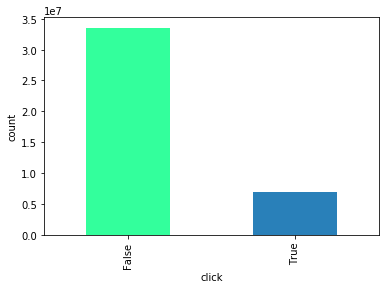

In [26]:
click_ratio = df.groupby('click').click.count()
click_ratio.plot(kind='bar', color=['#33FF9C', '#2980B9'])
plt.ylabel("count")
plt.show()

点击的数量和未点击的数量的比例为2:8，可以考虑使用下采样

18、统计各匿名特征中各种不同类别的点击和未点击的比例（包括'C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'）

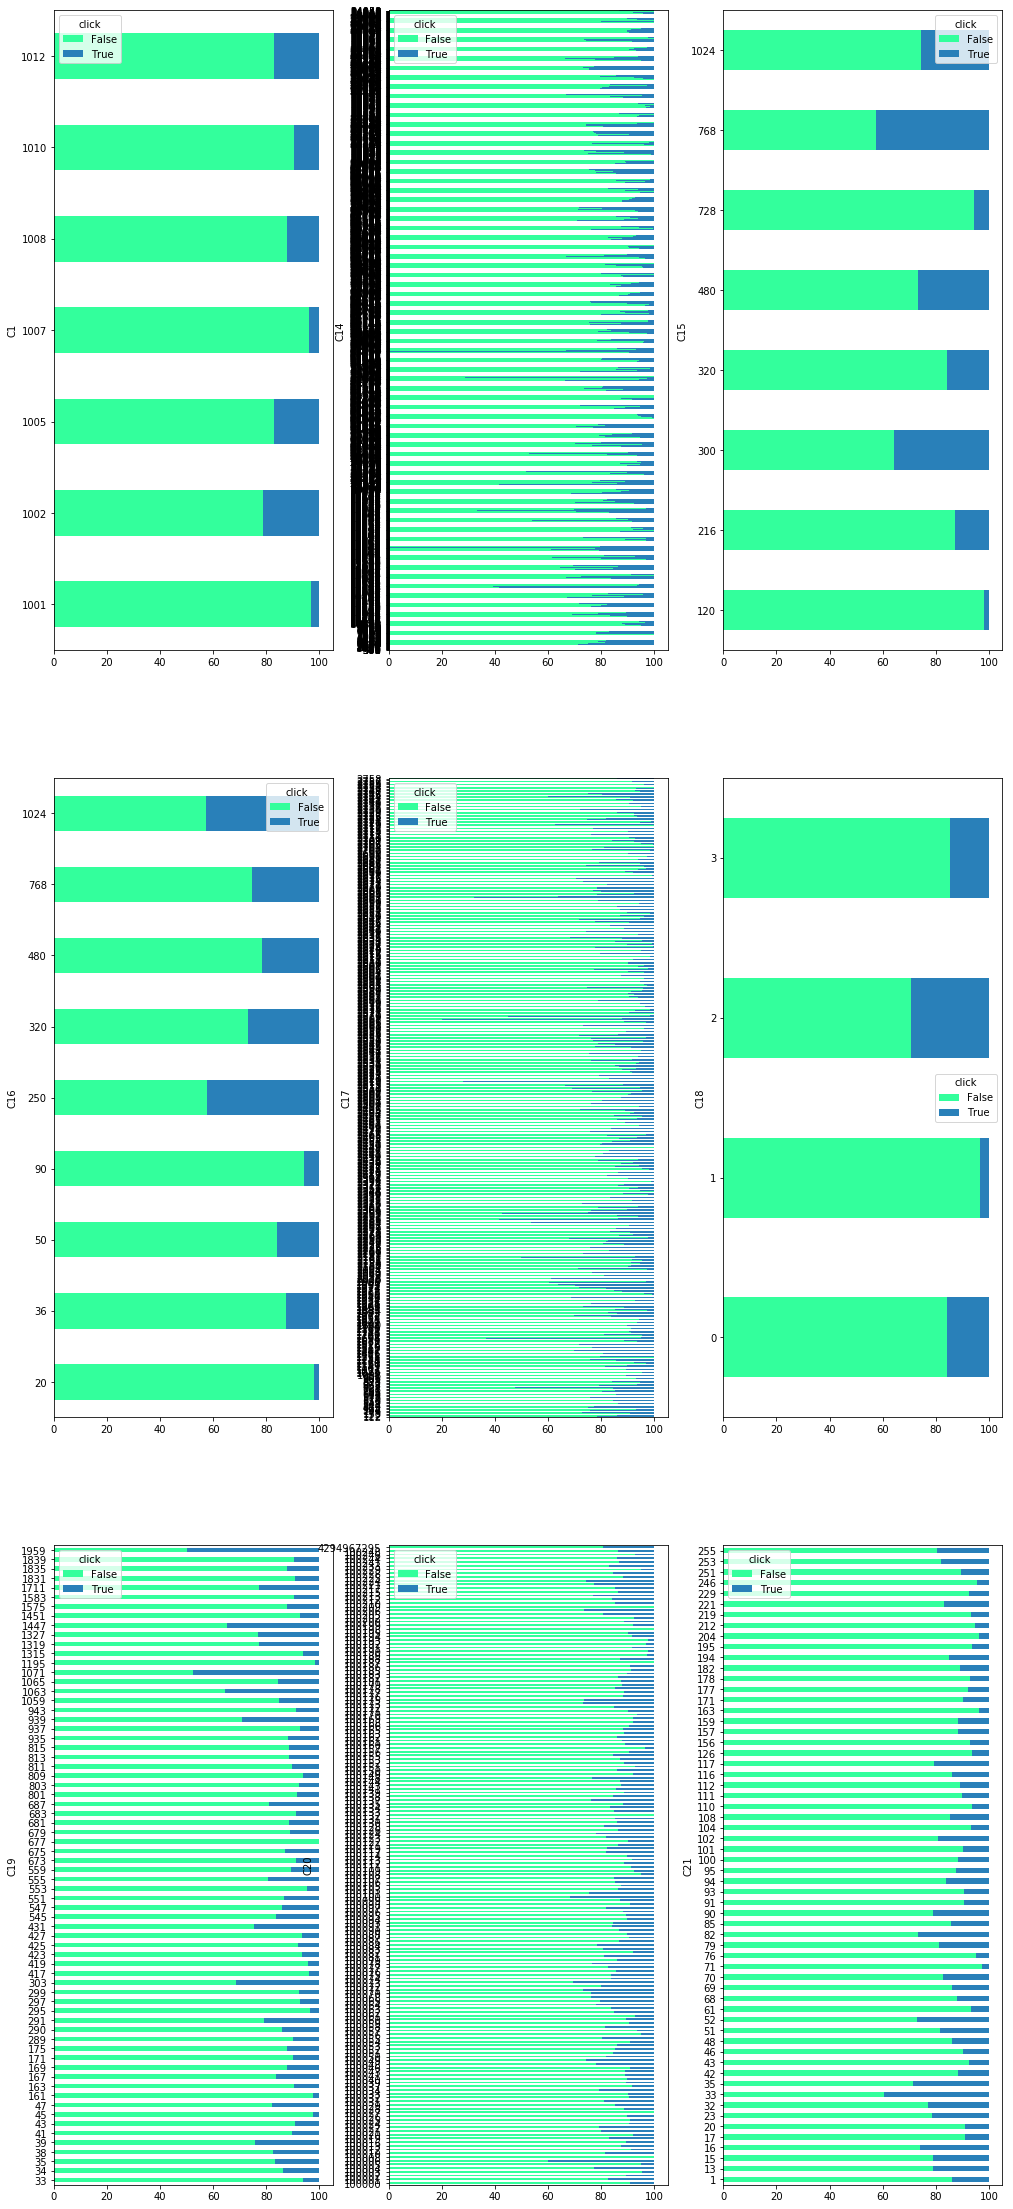

In [27]:
anonymize_features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

fig, axes = plt.subplots(figsize=(17, 40), nrows=3, ncols=3)

x = 0
for row in np.arange(3):
    for colum in np.arange(3):
        count_df = df.groupby([anonymize_features[x], 'click']).click.count()
        sum_df = df.groupby([anonymize_features[x]]).click.count()
        ratio_df = (count_df / sum_df) * 100
        ratio_df.unstack().plot(kind='barh', color=['#33FF9C', '#2980B9'], stacked=True, ax=axes[row, colum])
        x = x + 1
plt.show()

匿名类别特征C14、C17、C20和C21具有大量的属性，因此可能对正标签具有更大的影响，需要重点关注

19、每天中每小时的点击次数和未点击次数统计

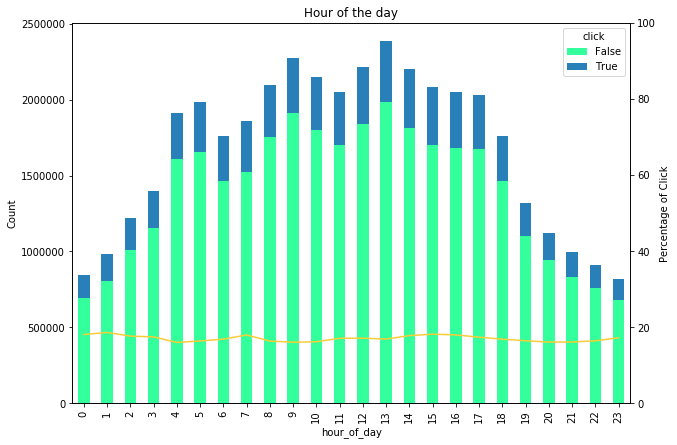

In [28]:
df['hour'] = df['hour'].apply(lambda x_: pd.datetime.strptime(x_, '%y%m%d%H'))
df['hour_of_day'] = df['hour'].apply(lambda x_: x_.hour)

fig, ax0 = plt.subplots(figsize=(10, 7))
ax1 = ax0.twinx()

hourday_df = df.groupby(['hour_of_day', 'click']).size()
hourday_df.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'], title="Hour of the day", ax=ax0)

click_by_hour = (df[df.click == 1].groupby(['hour_of_day']).size() / df.groupby(['hour_of_day']).size()) * 100

click_by_hour.plot(kind='line', ylim=(0, 100), ax=ax1, color='#FACC37')

ax0.set_ylabel("Count")
ax1.set_ylabel("Percentage of Click")

plt.show()

统计的目的是了解点击率是否在一天中的任何特定时间增加。
点击率保持在16%-18%的范围内，表明点击率的分布在一天中是相似的。

20、对“id”和“device_ip”进行统计

In [29]:
df[['id', 'device_ip']].groupby(['id', 'device_ip']).device_ip.count().reset_index(name="count").describe()

,count
count,40428967.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


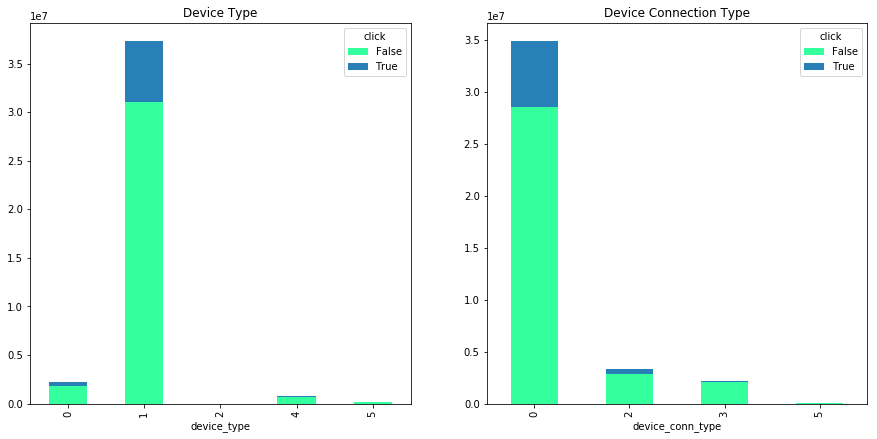

In [30]:
_, axes = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)

device_type = df.groupby(['device_type', 'click']).size()
device_type.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'], title='Device Type', ax=axes[0])

device_conn = df.groupby(['device_conn_type', 'click']).size()
device_conn.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'], title='Device Connection Type',
                           ax=axes[1])

plt.show()

设备IP是唯一的，对于设备类型和设备连接类型来说，其标准差为零，不太频繁的属性似乎不能很好的反映正标签

21、对Banner Position（广告位置）进行统计

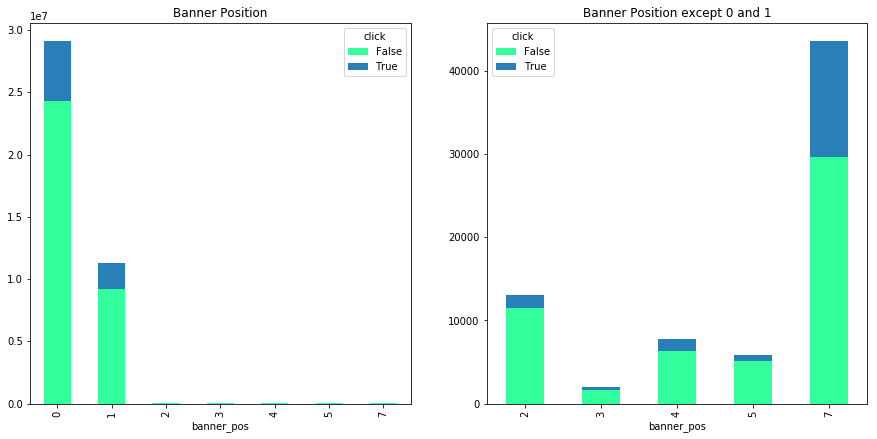

In [31]:
_, axes = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)

banner_pos = df.groupby(['banner_pos', 'click']).size()
banner_pos.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'], title='Banner Position', ax=axes[0])

banner_pos_zoom = banner_pos.iloc[4:]
banner_pos_zoom.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'],
                               title='Banner Position except 0 and 1', ax=axes[1])

plt.show()

位置在0和1是最常见的。位置7能够更好的反映正标签。

22、对与site和app相关的特征进行分析

In [32]:
df[['app_id', 'app_domain', 'app_category']].describe()

,app_id,app_domain,app_category
count,40428967,40428967,40428967
unique,8552,559,36
top,ecad2386,7801e8d9,07d7df22
freq,25832830,27237087,26165592


In [33]:
df[['site_id', 'site_domain', 'site_category']].describe()

,site_id,site_domain,site_category
count,40428967,40428967,40428967
unique,4737,7745,26
top,85f751fd,c4e18dd6,50e219e0
freq,14596137,15131739,16537234


In [34]:
print(df[(df.app_id == 'ecad2386') & (df.site_id == '85f751fd')].id.count())

0


site和app的ID是互补的。把这些特征合并在一起可以节省空间，且两者不可能同时出现

## 2、特征结果联合分布

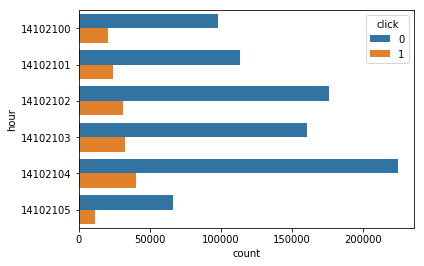

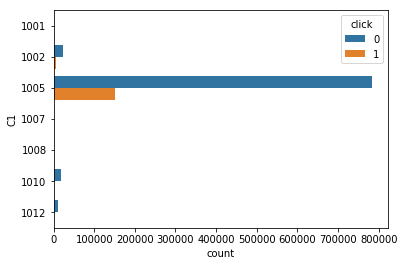

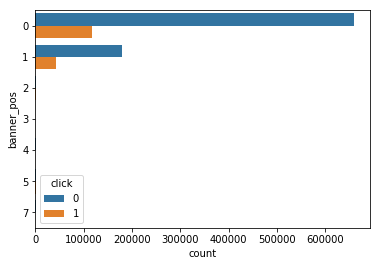

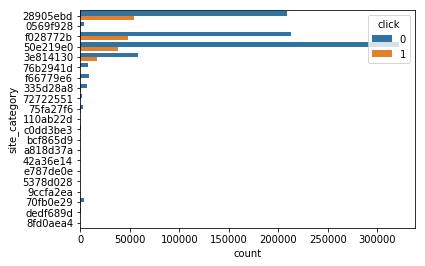

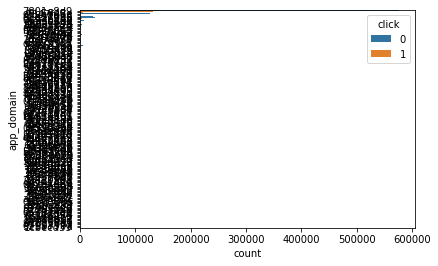

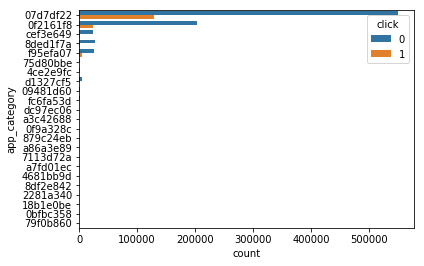

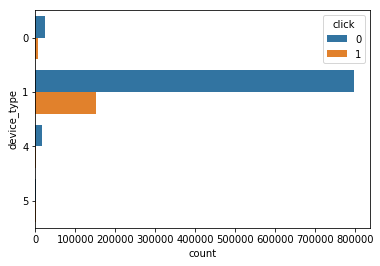

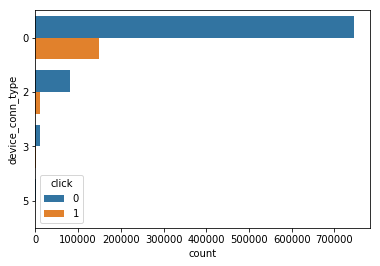

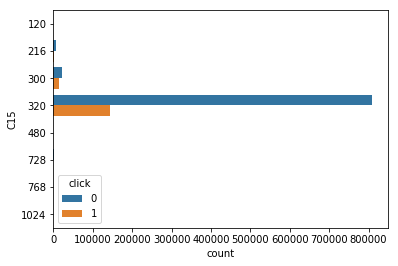

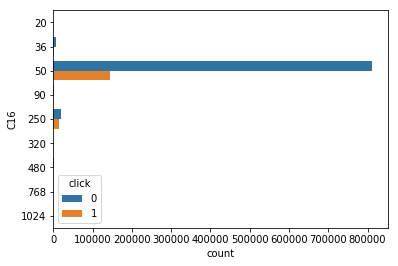

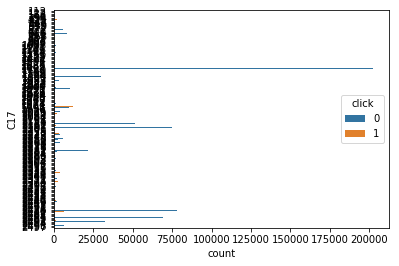

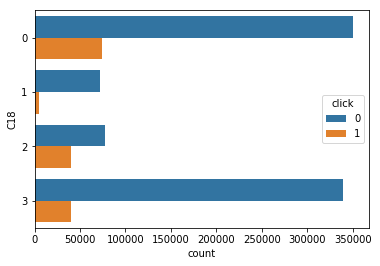

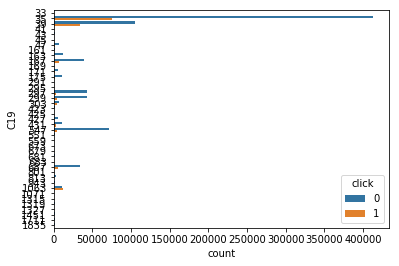

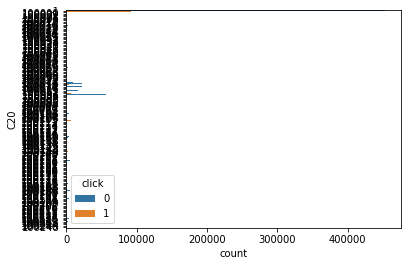

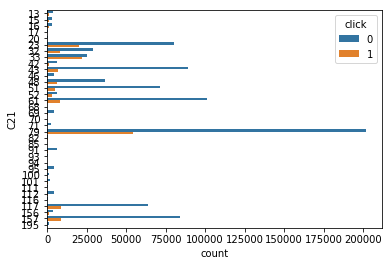

In [22]:
var=[ 'hour', 'C1', 'banner_pos', 'site_category',  'app_domain', 'app_category', 
        'device_type', 'device_conn_type', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
for v in var:
    #按多少的顺序排列的特征的列表
    sns.countplot(y=v,hue='click',hue_order=[0,1],data=df)
    plt.show()

## 3、重点关注特征

### 取概率提升比达到30%的特征，即概率提升5%的特征作为重点关注的特征，为避免样本没有代表性，要求该特征的样本数大于10，其它特征也有一定作用（比如hour），但作用可能没这么明显，对重点特征可在特征工程时候着重考虑。

In [45]:
for v in var:
    print('\n%s属性的取值和次数'%v)
    P=pd.concat([df[v].value_counts(),df[v].value_counts(normalize=True),\
                   train_df_click[v].value_counts(normalize=True)],\
                   axis=1,join_axes=[df[v].value_counts().index],keys=['特征分布','P_C','P_C|A']).fillna(0)
    #P(A│ci)=(P(ci│A)P(A))/(P(ci))
    P['P_A|C']=(P['P_C|A']*P_A)/P['P_C']
    P['概率提升比%']=(P['P_A|C']-P_A)*100/P_A
    P=P[(P['概率提升比%']>30)&(P['特征分布']>10)]
    print(P.sort_values(by='概率提升比%',ascending=False))


hour属性的取值和次数
Empty DataFrame
Columns: [特征分布, P_C, P_C|A, P_A|C, 概率提升比%]
Index: []

C1属性的取值和次数
Empty DataFrame
Columns: [特征分布, P_C, P_C|A, P_A|C, 概率提升比%]
Index: []

banner_pos属性的取值和次数
    特征分布       P_C     P_C|A   P_A|C     概率提升比%
7  43577  0.001078  0.002032  0.3201  88.509688

site_category属性的取值和次数
             特征分布       P_C     P_C|A     P_A|C      概率提升比%
dedf689d    24500  0.000606  0.001834  0.514000  202.699042
3e814130  3050306  0.075449  0.125745  0.283003   66.662768
42a36e14     2515  0.000062  0.000085  0.231014   36.046092

app_domain属性的取值和次数
            特征分布           P_C         P_C|A     P_A|C      概率提升比%
5576cc84      21  5.194295e-07  2.476305e-06  0.809524  376.735568
999f1fac      33  8.162464e-07  3.204631e-06  0.666667  292.605762
99b4c806   10041  2.483615e-04  9.372088e-04  0.640773  277.356658
391ef1c3      11  2.720821e-07  1.019655e-06  0.636364  274.760045
73fc6786     105  2.597148e-06  9.613892e-06  0.628571  270.171147
eaaf6d12      53  1.310941e-06  4.8

       特征分布       P_C     P_C|A     P_A|C      概率提升比%
33  1497559  0.037042  0.085930  0.393919  131.982326
35    46707  0.001155  0.001935  0.284454   67.517508
52  1203050  0.029757  0.047446  0.270743   59.442713
82    71393  0.001766  0.002767  0.266091   56.703003
16   347178  0.008587  0.013123  0.259501   52.822317
32  1783343  0.044111  0.059836  0.230343   35.651123
